Importing Necessary Modules


In [23]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import pandasql as psql
sql=psql.sqldf
import numpy as np
sns.set_style("dark")
from wordcloud import WordCloud, STOPWORDS
!pip install pywaffle
from pywaffle import Waffle
sns.set_palette("pastel")


In [43]:
df = pd.read_csv('udemy_courses.csv')
head=df.head(100)
head

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.50,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.00,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.50,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.00,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.00,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23T22:19:57Z,Business Finance
96,959144,Practical Accounts APP Overview,https://www.udemy.com/practical-accounts-app-o...,True,20,1361,1,14,Intermediate Level,3.00,2016-10-04T23:38:32Z,Business Finance
97,1233350,Bitcoin Profits for Beginners,https://www.udemy.com/bitcoin-profits-for-begi...,True,100,61,18,30,Beginner Level,1.50,2017-06-09T17:01:05Z,Business Finance
98,572744,Trend Traders Club: How To Find And Trade Fast...,https://www.udemy.com/how-to-find-and-trade-pr...,True,75,1513,31,60,All Levels,5.50,2015-08-04T19:16:51Z,Business Finance


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [44]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [27]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [28]:
df = df.drop(columns = ['course_id','url'], axis = 1)

In [30]:
df.loc[df.num_subscribers.idxmax()]['course_title']

'Learn HTML5 Programming From Scratch'

In [31]:
df.loc[df.num_reviews.idxmax()]['course_title']

'The Web Developer Bootcamp'

In [33]:
df.groupby(['is_paid']).mean()['num_reviews']

is_paid
False    425.929032
True     131.437945
Name: num_reviews, dtype: float64

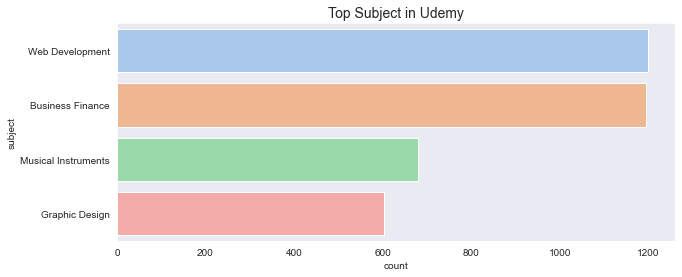

In [34]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.subject, data = df, order = df.subject.value_counts().index)
plt.title("Top Subject in Udemy", fontsize = 14)
plt.show()

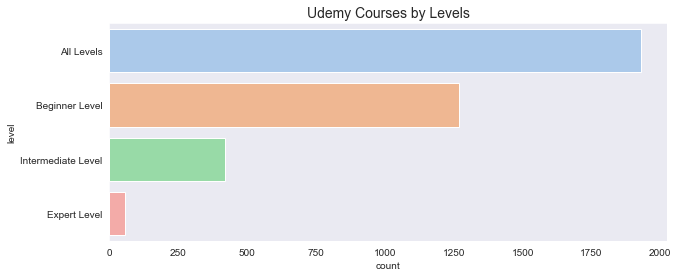

In [35]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.level, data = df, order = df.level.value_counts().index)
plt.title("Udemy Courses by Levels", fontsize = 14)
plt.show()

In [36]:
df=sql('''select * from df where content_duration not like ("%question%") and content_duration not like ("%Beginner Level%")''')

In [42]:
df[df['content_duration']=='Beginner Level']


C:\Users\BS\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


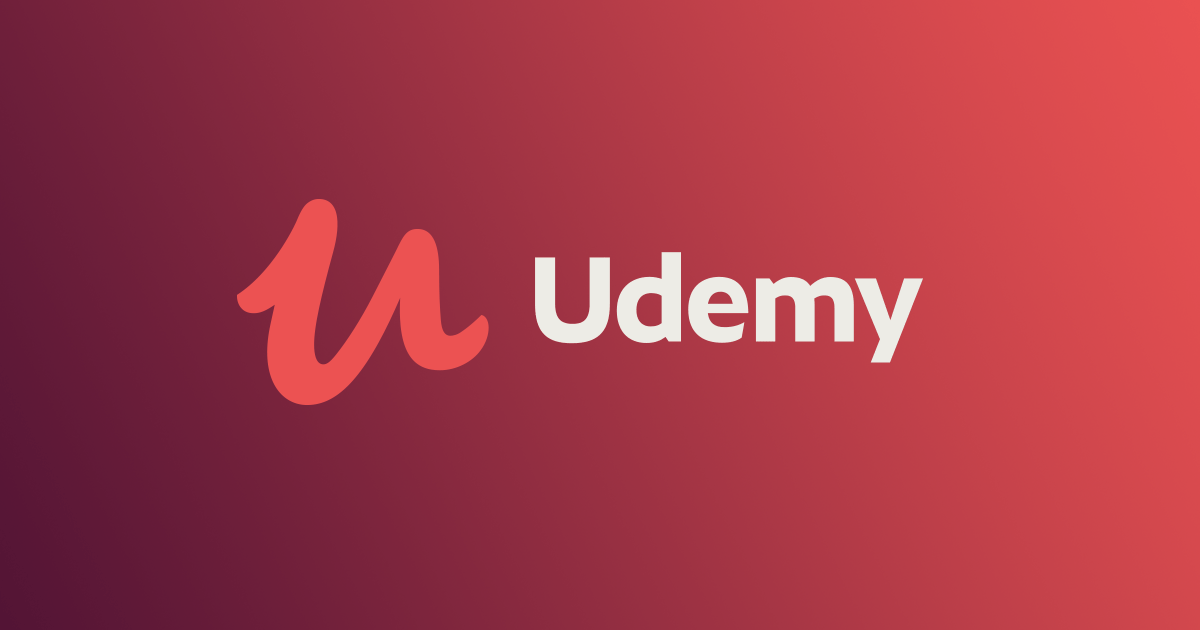

# Udemy is an online learning and teaching marketplace with over 100000 courses and 24 million students. We are going to investigate the data using Pandas & SQL and show some insights about its courses! I'll also integrate a Tableau Dashboard (in development) in the end.

# Hope you like it!




In [4]:
df = pd.read_csv('udemy_courses.csv')
head=df.head(100)
head

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.50,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.00,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.50,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.00,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.00,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23T22:19:57Z,Business Finance
96,959144,Practical Accounts APP Overview,https://www.udemy.com/practical-accounts-app-o...,True,20,1361,1,14,Intermediate Level,3.00,2016-10-04T23:38:32Z,Business Finance
97,1233350,Bitcoin Profits for Beginners,https://www.udemy.com/bitcoin-profits-for-begi...,True,100,61,18,30,Beginner Level,1.50,2017-06-09T17:01:05Z,Business Finance
98,572744,Trend Traders Club: How To Find And Trade Fast...,https://www.udemy.com/how-to-find-and-trade-pr...,True,75,1513,31,60,All Levels,5.50,2015-08-04T19:16:51Z,Business Finance


In [5]:
#Checking the columns that we have
column=df.columns
column

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
#Let's drop the column that is not relevant for our EDA
df=df.drop(['course_id'],axis=1)
df.head(5)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
#Checking Missing Data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing=missing_data(df)
missing

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,bool,int64,int64,int64,int64,object,float64,object,object


# Data look clean! That's cool!

# Let's adjust the content duration column - there are some weird values there such as "Question", "beginner level" and hours/min

In [8]:
#Removing the string "hour"
df['content_duration']=df['content_duration'].astype(str).str.replace('hours','')
df['content_duration']=df['content_duration'].astype(str).str.replace('hour','')
#Transforming minutes in hours
df.loc[df['content_duration'].str.contains('mins')==True,'content_duration']=df.loc[df['content_duration'].str.contains('mins')==True,'content_duration'].str.replace('mins','').astype('float')/60


In [9]:
#Excluding strange values such as "question" "beginner level" from the df.
df=sql('''select * from df where content_duration not like ("%question%") and content_duration not like ("%Beginner Level%")''')

df['content_duration']=df['content_duration'].astype('float').round(2)

df['content_duration'].unique()

array([ 1.5 , 39.  ,  2.5 ,  3.  ,  2.  ,  1.  ,  5.  ,  7.  ,  4.  ,
        0.58,  4.5 ,  6.5 , 10.  ,  5.5 ,  7.5 , 11.5 , 16.  ,  3.5 ,
        9.  ,  8.5 , 11.  ,  0.7 ,  9.5 ,  0.55, 62.  ,  0.13,  0.68,
       31.5 , 20.  ,  6.  , 46.5 ,  0.72, 17.5 , 12.  ,  0.53, 24.  ,
       19.5 , 20.5 ,  0.5 , 10.5 ,  0.52,  0.6 ,  8.  , 29.  , 26.  ,
       24.5 , 13.  ,  0.73,  0.57, 12.5 ,  0.32,  0.62,  0.67, 18.  ,
       33.  , 71.5 , 47.  , 14.5 ,  0.65, 18.5 , 43.5 ,  0.63, 14.  ,
        0.47, 45.  , 70.  ,  0.  , 29.5 , 13.5 ,  0.45, 21.  , 68.5 ,
       30.  , 17.  , 16.5 , 15.  , 78.5 ,  0.48, 34.  , 31.  , 15.5 ,
       28.5 , 23.  , 38.  , 32.5 , 19.  , 37.5 , 25.  , 25.5 , 60.  ,
       22.5 , 21.5 , 27.5 , 44.5 , 51.  , 57.  , 76.5 , 22.  , 30.5 ,
       43.  , 42.  , 26.5 , 48.5 , 23.5 , 66.5 ])

# Content duration values are now fine.

In [10]:
#Creating a date column using pd.datetime -  (it can be useful when we create our Tableau Dash.)
df['date']= pd.to_datetime(df['published_timestamp'], format = '%Y-%m-%d')
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [11]:
#Transforming Price to Float and cleaning if necessary
df['price'].unique()
df['price']=df['price'].replace('Free','0').astype(float)

   is_paid  count(is_paid)
0        0             310
1        1            3368


Text(0.5, 0, 'Paid')

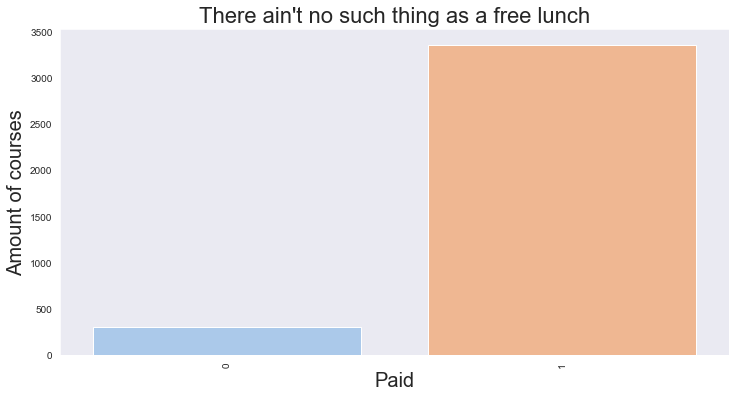

In [12]:
#Ok good enough - let's start plotting the number of costs paid/free
Free_or_not=sql('''select is_paid,count(is_paid) from df 
                                                group by is_paid''')
print(Free_or_not)
#We can see that we need to adjust the False and True - we have different variations.
df['is_paid']=df['is_paid'].replace('False','FALSE')
df['is_paid']=df['is_paid'].replace('True','TRUE')

#Checking..
Free_or_not=sql('''select is_paid,count(is_paid) as "Values" from 
                                            df group by is_paid''')
plt.figure(figsize=(12,6))
sns.barplot(x='is_paid',y='Values',data=Free_or_not)
plt.xticks(rotation=90)
plt.title("There ain't no such thing as a free lunch", fontsize = 22)
plt.ylabel('Amount of courses', fontsize = 20)
plt.xlabel('Paid', fontsize = 20)

# There is not such thing as free lunch...

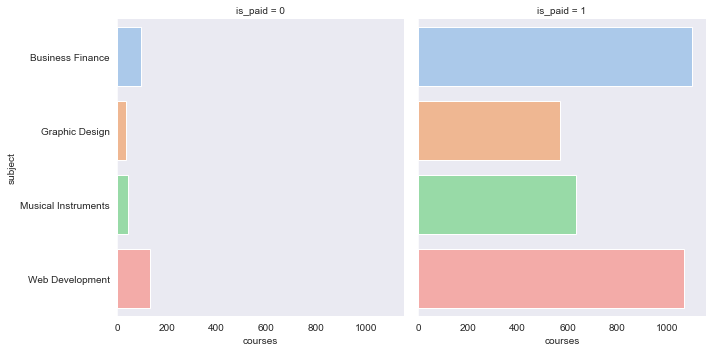

In [13]:
#Courses by Topic?
courses_by_topic=sql('''select subject, count(course_title) as courses, is_paid
                     from df
                     group by subject, is_paid''')
sns.catplot(y='subject',x='courses',col='is_paid',kind='bar',data=courses_by_topic)



Web Development and Business Finance Courses are the most popular in Udemmy

               subject      Share
0      Web Development  32.626427
1     Business Finance  32.490484
2  Musical Instruments  18.488309
3       Graphic Design  16.394780


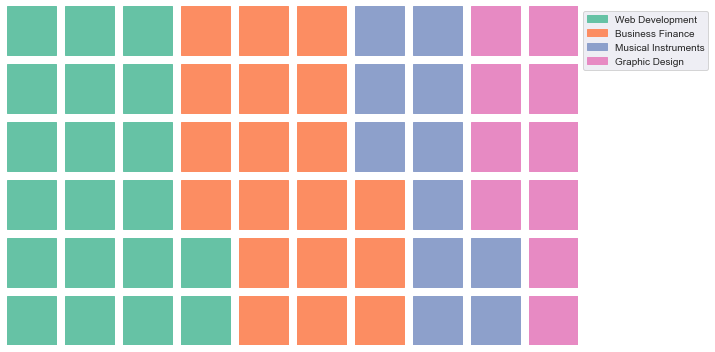

In [14]:
#Calculating the % by Subject using SQL and then a Waffle Chart
courses_per=sql('''select subject, 100.*count(course_title)/sum(count(course_title)) over () as Share
              from df
              group by subject
              order by Share desc''')
                          
waffle=plt.figure(
    FigureClass=Waffle,
    rows=6,
    columns=10,
    values=courses_per.Share,
    labels=list(courses_per.subject),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(16,5)
)
print(courses_per)

# Web Development = 33%
# Business Finance 33%
# Musical Instruments = 18%
# Graphic Design = 16%

Text(0.5, 1.0, 'Price Distribution per Subject')

<Figure size 1800x720 with 0 Axes>

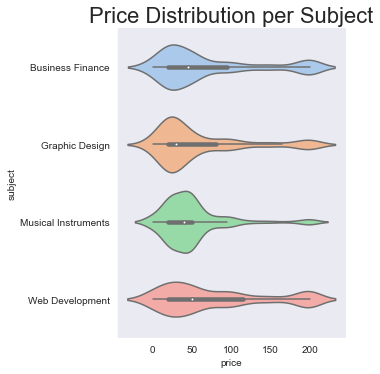

In [15]:
plt.figure(figsize=(25,10))
sns.catplot(x='price',y='subject',data=df,kind='violin')
plt.title('Price Distribution per Subject',fontsize = 22)

ValueError: left cannot be >= right

<Figure size 864x432 with 0 Axes>

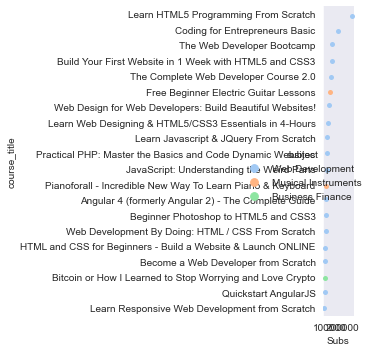

In [16]:
#What are the most popular courses? Let's Check the Top 20
popular_courses=sql('''select course_title,subject, sum(num_subscribers) as Subs from df
                                                                        group by course_title, subject 
                                                                        order by Subs Desc limit 20''')
plt.figure(figsize=(12,6))
sns.catplot(x='Subs',y='course_title',hue='subject',data=popular_courses)
plt.xticks(rotation=90)
plt.title("Top 20 Courses by #Subs", fontsize = 22)
plt.ylabel('Course Name', fontsize = 20)
plt.xlabel('Number of Subs', fontsize = 20)

# Top 20 is dominated by the Web Dev topic - Learn HTML5 from Scratch has a immense amount of Subs.
# There are only 2 topics outside of Web Dev in the top 20

<Figure size 864x432 with 0 Axes>

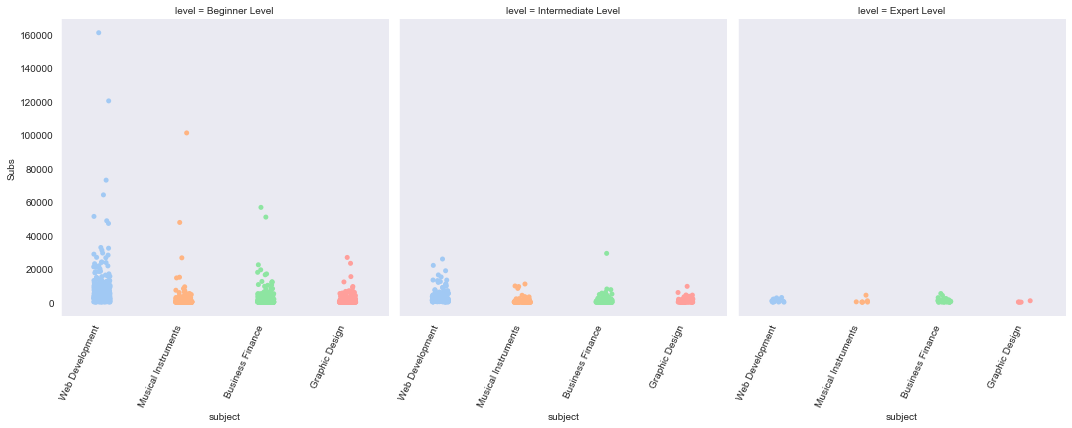

In [17]:
#Let's see the number of subs by level?
popular_course_level=sql('''select course_title,subject,level, sum(num_subscribers) as Subs from df 
                                                                where level not like ('%All%') 
                                                                group by course_title, subject,level 
                                                                order by Subs desc''')
plt.figure(figsize=(12,6))
g=sns.catplot(x='subject',y='Subs',col='level',data=popular_course_level)
g.set_xticklabels(rotation=65, horizontalalignment='right')


# Beginner Levels have more subs - which makes sense.

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 864x432 with 0 Axes>

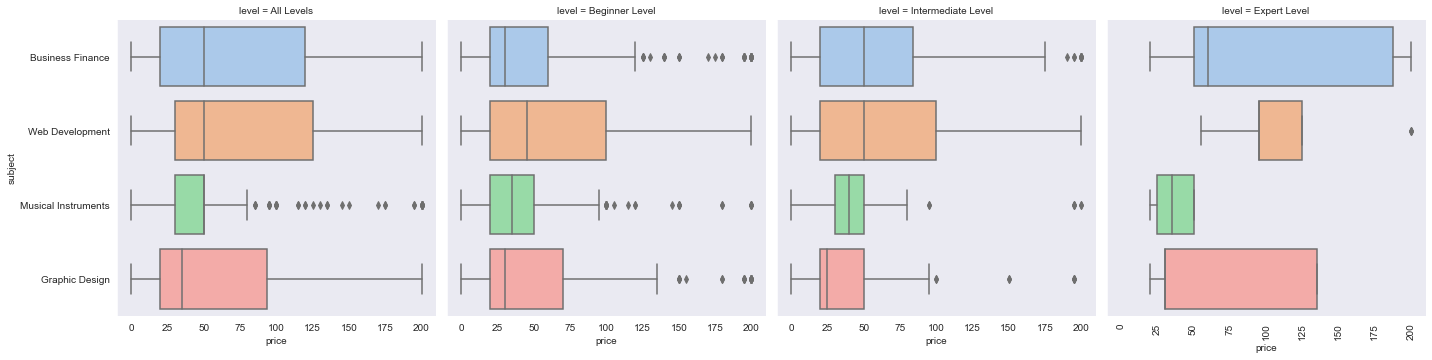

In [18]:
#Beginner level courses are more popular. Are they cheaper as well?

beginner=sql('''select course_title, subject,level,price 
             from df
         
             group by course_title,subject,level 
             order by price desc''')
             
plt.figure(figsize=(12,6))
sns.catplot(x='price',y='subject',col='level',kind='box',data=beginner)
plt.xticks(rotation=90)

Text(0.5, 0, 'Content Duration in Hours')

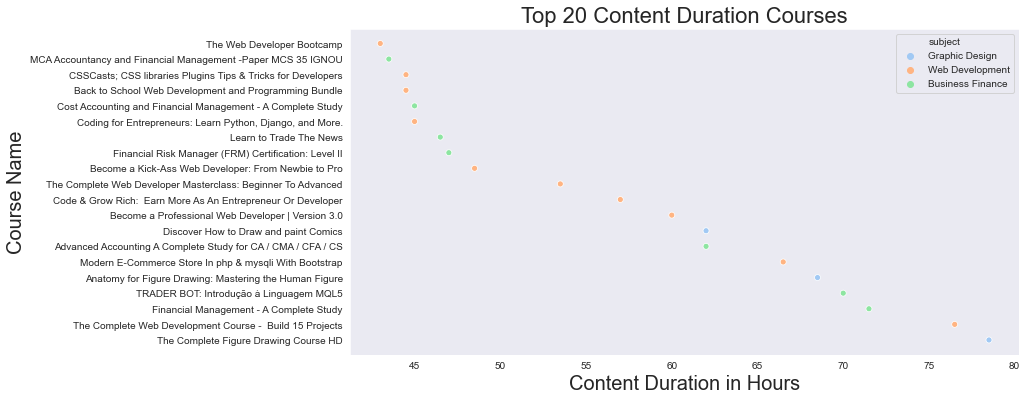

In [19]:
#What are the courses with more content? Let's Check the Top 20
contenttop20=sql('''select course_title,subject, sum(content_duration) as content_duration from 
                    df group by course_title, 
                    subject 
                    order by content_duration desc limit 20''')
plt.figure(figsize=(12,6))
sns.scatterplot(x='content_duration',y='course_title',hue='subject',data=contenttop20)
plt.title("Top 20 Content Duration Courses", fontsize = 22)
plt.ylabel('Course Name', fontsize = 20)
plt.xlabel('Content Duration in Hours', fontsize = 20)

# Drawing must be really hard :)

Text(0.5, 1.0, 'Correlation between the variables')

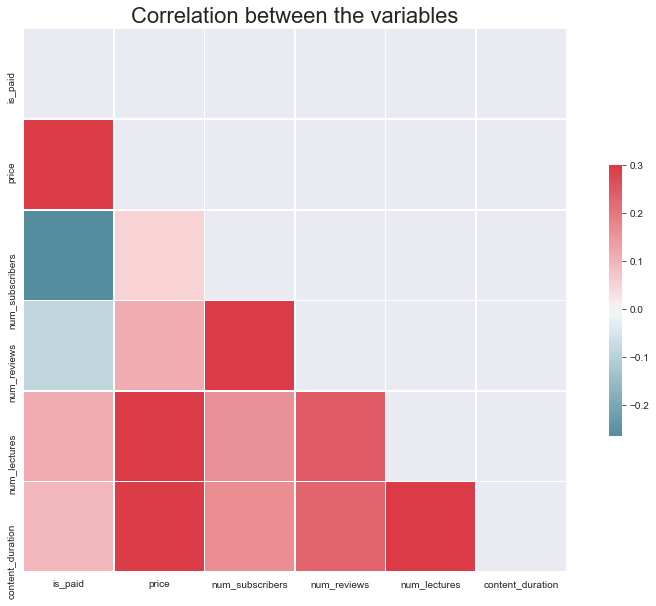

In [20]:
#Correlation between the variables?
corr=df.iloc[:,:12].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between the variables',fontsize=22)

Number of Subscribes have a moderate correlation with number of review.
Prices also have a moderate correlation with Number of Lectures and Content Duration - which also makes sense. The author of the course has to charge more since he/she spent more time creating the course.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

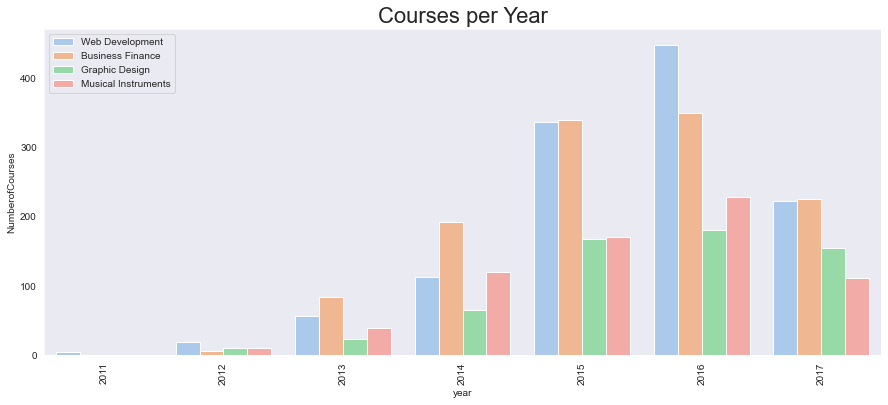

In [21]:
#We have date information - let's try to extract something from there..

#courses published?

per_year=sql('''select year,subject, sum(count(course_title)) over (partition by year, subject) as NumberofCourses 
             from df 
             group by year,subject
             order by year''')

plt.figure(figsize=(15,6))
g2=sns.barplot(x='year',y='NumberofCourses',data=per_year,hue='subject')
plt.title('Courses per Year',fontsize=22)    
plt.legend(loc='upper left')      
plt.xticks(rotation=90)

# I used the window function from SQL which is very useful to do this kind of analysis - you can find more details here https://mode.com/sql-tutorial/sql-window-functions/

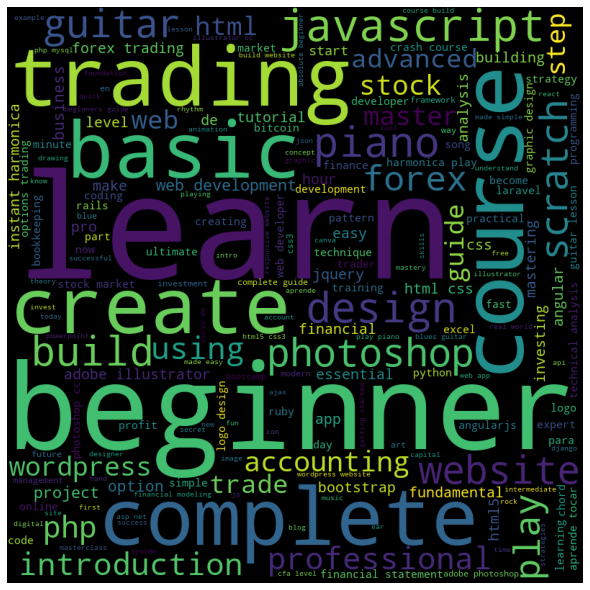

In [22]:
#Code taken from https://www.kaggle.com/sayar1106/comprehensive-eda-on-udemy-data - Sayar

comment_words = ''
stopwords = set(STOPWORDS)

for s in df.course_title:
    s = str(s)
    tokens = s.split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# These are the main words when we analyze the course_titles column. Beginners seems to appear a lot and this reflect what we have seen so far on our analysis!

Tableau Viz - https://public.tableau.com/views/Udemy_15900586631370/Dashboard1?:retry=yes&:display_count=y&:origin=viz_share_link

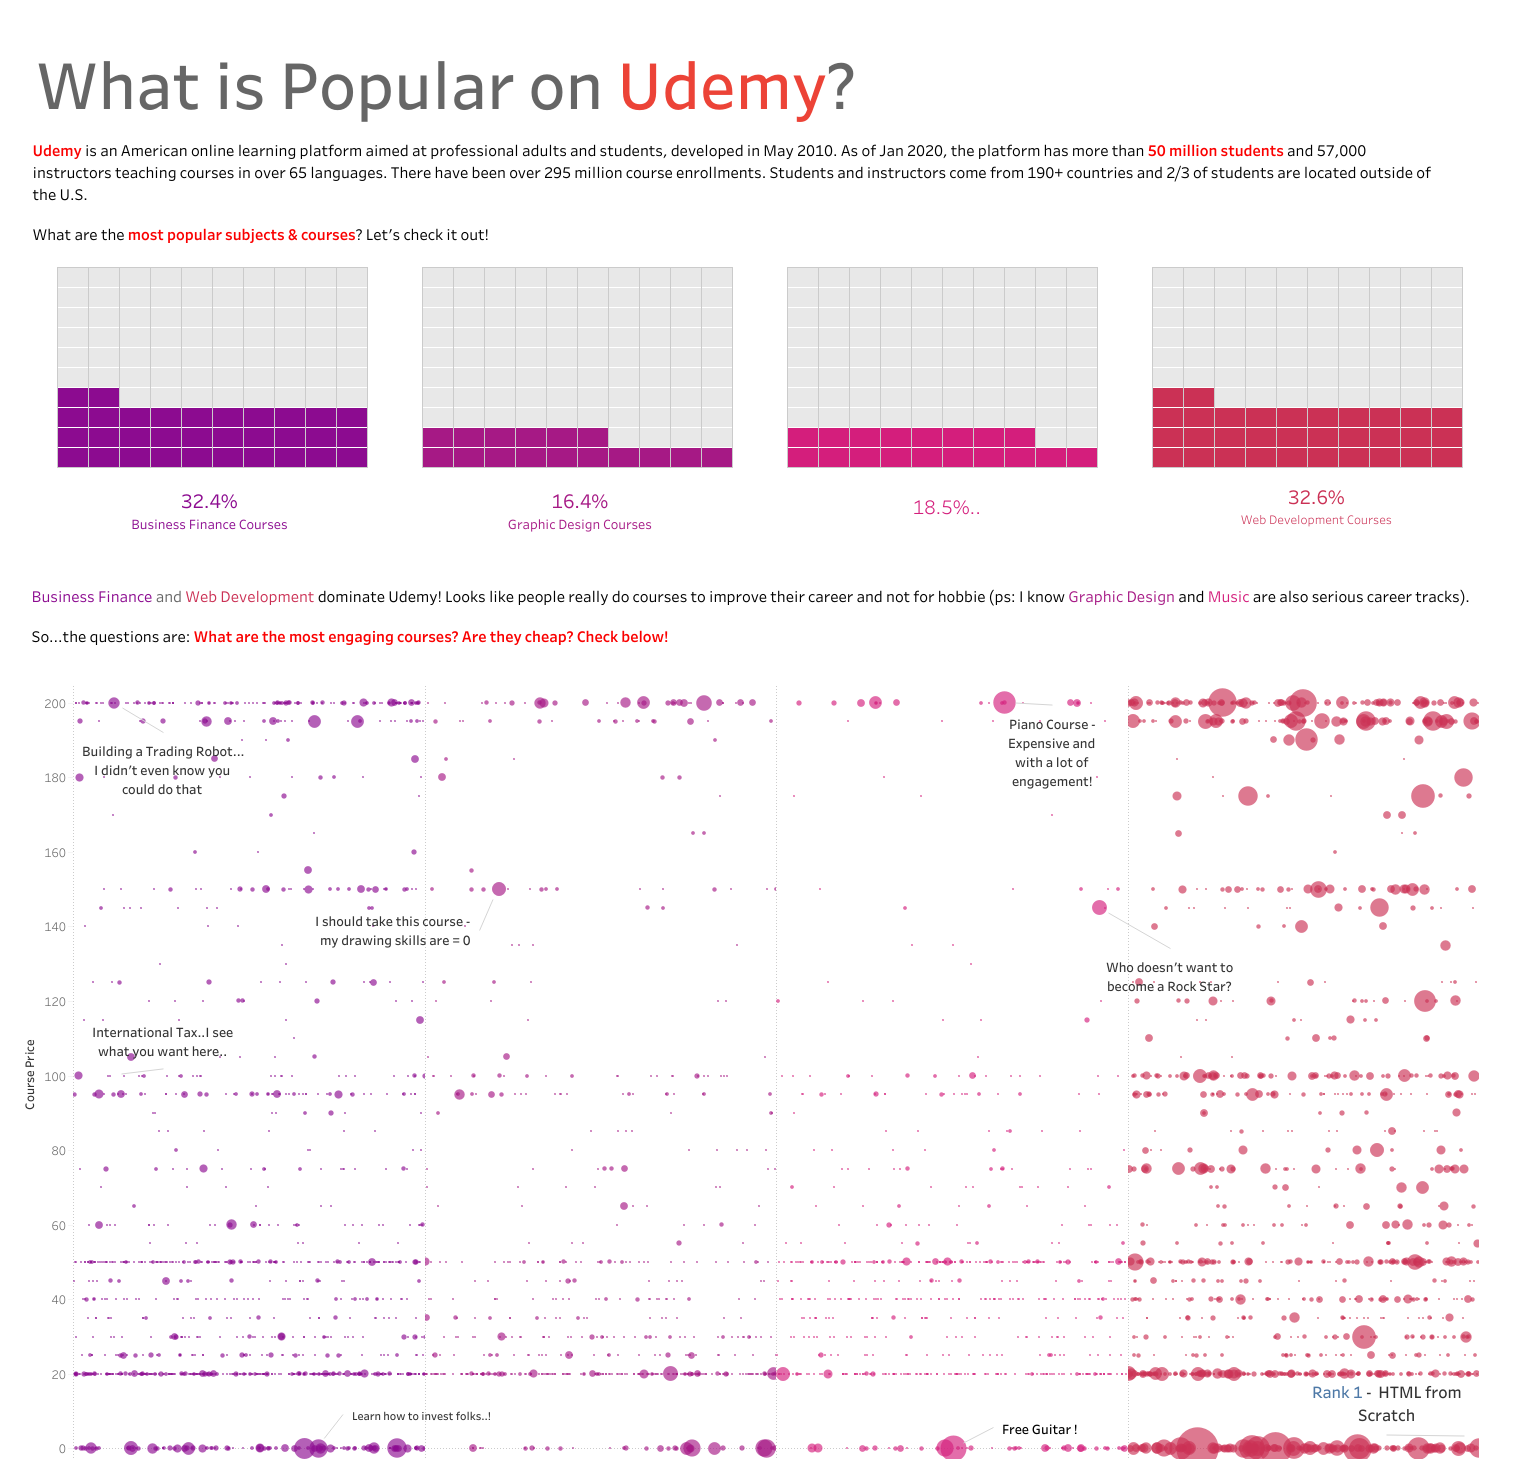

